In [1]:
import numpy as np
import pandas as pd
import pyspark 
from pyspark import *
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation

In [2]:
df = sqlContext.sql("SELECT * FROM attrition_csv")

In [3]:
vector_assembler = VectorAssembler(inputCols = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],outputCol = "features")
vectorised_df = vector_assembler.transform(df)

In [4]:
str_indexer = StringIndexer(inputCol = "Attrition" , outputCol = 'label')
indexed_vectorised_df = str_indexer.fit(vectorised_df).transform(vectorised_df)
df = indexed_vectorised_df


In [5]:
splits = df.randomSplit([0.6,0.4],seed = 1)
training_df = splits[0]
test_df = splits[1]


In [6]:
from pyspark.ml.classification import DecisionTreeClassifier
dt_definition  = DecisionTreeClassifier(labelCol = 'label',featuresCol = 'features')
dt_model = dt_definition.fit(training_df)
dt_df = dt_model.transform(test_df)


In [7]:
# training and testing is done 

In [8]:
#plot heat map of test data first for orignal correlation values for true attrition employees

In [9]:
test_df = test_df.toPandas()

In [10]:
test_df_filtered = test_df[test_df['Attrition'] == 'Yes']


In [11]:
test_df_numeric = test_df_filtered.dropna()

In [12]:
test_df_corr = test_df_numeric.corr()
test_df_corr = test_df_corr.ix[1:,1:]

In [13]:
import seaborn as sb

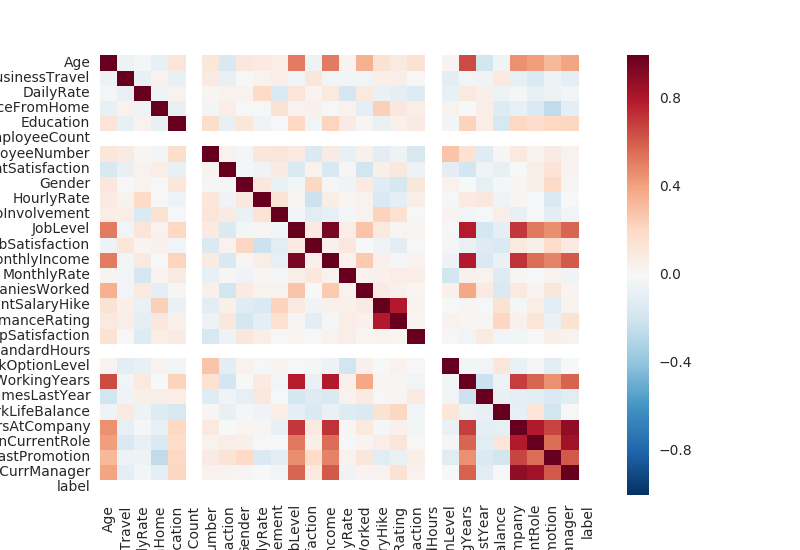

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
display(sb.heatmap(test_df_corr).figure)

In [15]:

# to compare with the correlation heatmap of predicted model by Decision Tree Algorith 

In [16]:
dt_df_pandas = dt_df.toPandas()

In [17]:
dt_df_filtered = dt_df_pandas[dt_df_pandas['Attrition'] == 'Yes']

In [18]:
dt_df_numeric = dt_df_filtered.dropna()

In [19]:
dt_df_corr = dt_df_numeric.corr()
dt_df_corr = dt_df_corr.ix[1:,1:]

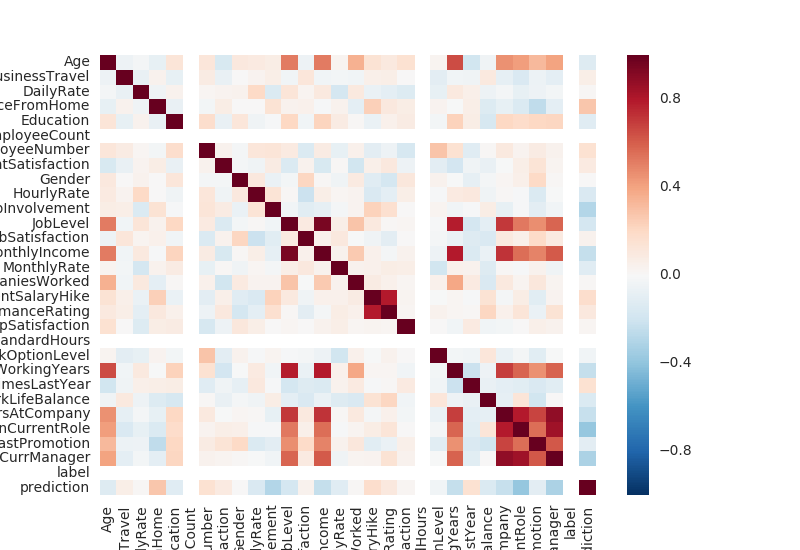

In [20]:
fig, ax = plt.subplots()
display(sb.heatmap(dt_df_corr).figure)